<a href="https://colab.research.google.com/github/nicholasfurl/Great-Courses/blob/main/decisionTreeLesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2022-12-30 10:37:45--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2022-12-30 10:37:45 (10.2 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
!pwd

/content


In [ ]:
!ls

diabetes.csv  sample_data


In [2]:
with open("diabetes.csv", "r") as f:
    data = f.readlines()

In [4]:
feats = data[0]
feats

'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\n'

In [ ]:
test = data[0][0]
test

'P'

In [5]:
feats = feats.replace('\n','')
feats

'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome'

In [6]:
feats = feats.split(",")
feats

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
print(feats)
feats

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
print(len(data))
len(data)

769


769

In [7]:
feats = feats[0:(len(feats)-1)]	
feats

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
dat = []				
labs = []
i=1
line = data[i]  #line is actually a string, not numbers
line = line.replace('\n','')		#seems like we already did this above? (no we did it to labels, these are data)
csvline = line.split(",")		  #split takes a big string and splits it into smaller ones (based on commas presumably)
print(line)
labs = labs + [int(csvline[len(csvline)-1])]    #I guess the last column of data "Outcome" must be the labels we want.
print(labs)
csvline = [float(csvline[i]) for i in range(len(csvline)-1)]    #seems to take the csvline (split into strings, then converts every string in the row one by one to float)
print(csvline)
dat = dat + [csvline]


In [8]:
dat = []				
labs = []
for i in range(1,len(data)):
  line = data[i]  #line is actually a string, not numbers
  line = line.replace('\n','')		#seems like we already did this above? (no we did it to labels, these are data)
  csvline = line.split(",")		  #split takes a big string and splits it into smaller ones (based on commas presumably)
  #print(line)
  labs = labs + [int(csvline[len(csvline)-1])]    #I guess the last column of data "Outcome" must be the labels we want.
  #print(labs)
  csvline = [float(csvline[i]) for i in range(len(csvline)-1)]    #seems to take the csvline (split into strings, then converts every string in the row one by one to float)
  #print(csvline)
  dat = dat + [csvline]


In [ ]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 3)	
clf = clf.fit(dat, labs)			

In [9]:
from sklearn import tree
import graphviz 

In [ ]:
i=0
print(dat[i])         #data to classify
print(clf.predict([dat[i]])) #model's guess
print(labs[i])
print(dat[i+1])         #data to classify
print(clf.predict([dat[i+1]])) #model's guess
print(labs[i+1])


[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]
[1]
1
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0]
[0]
0


In [ ]:
correct = 0						
for i in range(len(dat)):	
    if clf.predict([dat[i]]) == labs[i]: correct = correct + 1
100.0* correct / len(dat)

77.21354166666667

In [ ]:
dot_data = tree.export_graphviz(clf, feature_names=feats,
                      filled=True, rounded=True)
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Glucose <= 127.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]", fillcolor="#f3c5a3"] ;
1 [label="gini = 0.313\nsamples = 485\nvalue = [391, 94]", fillcolor="#eb9f69"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="BMI <= 29.95\ngini = 0.474\nsamples = 283\nvalue = [109, 174]", fillcolor="#b5daf5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.432\nsamples = 76\nvalue = [52, 24]", fillcolor="#f1bb94"] ;
2 -> 3 ;
4 [label="gini = 0.399\nsamples = 207\nvalue = [57, 150]", fillcolor="#84c2ef"] ;
2 -> 4 ;
}


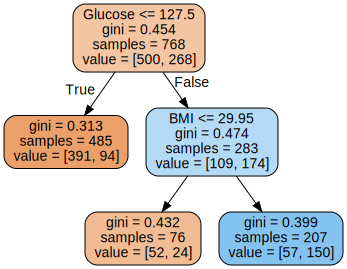

In [ ]:
graph = graphviz.Source(dot_data)	
print(graph)
graph

proportion correct: 82.8125


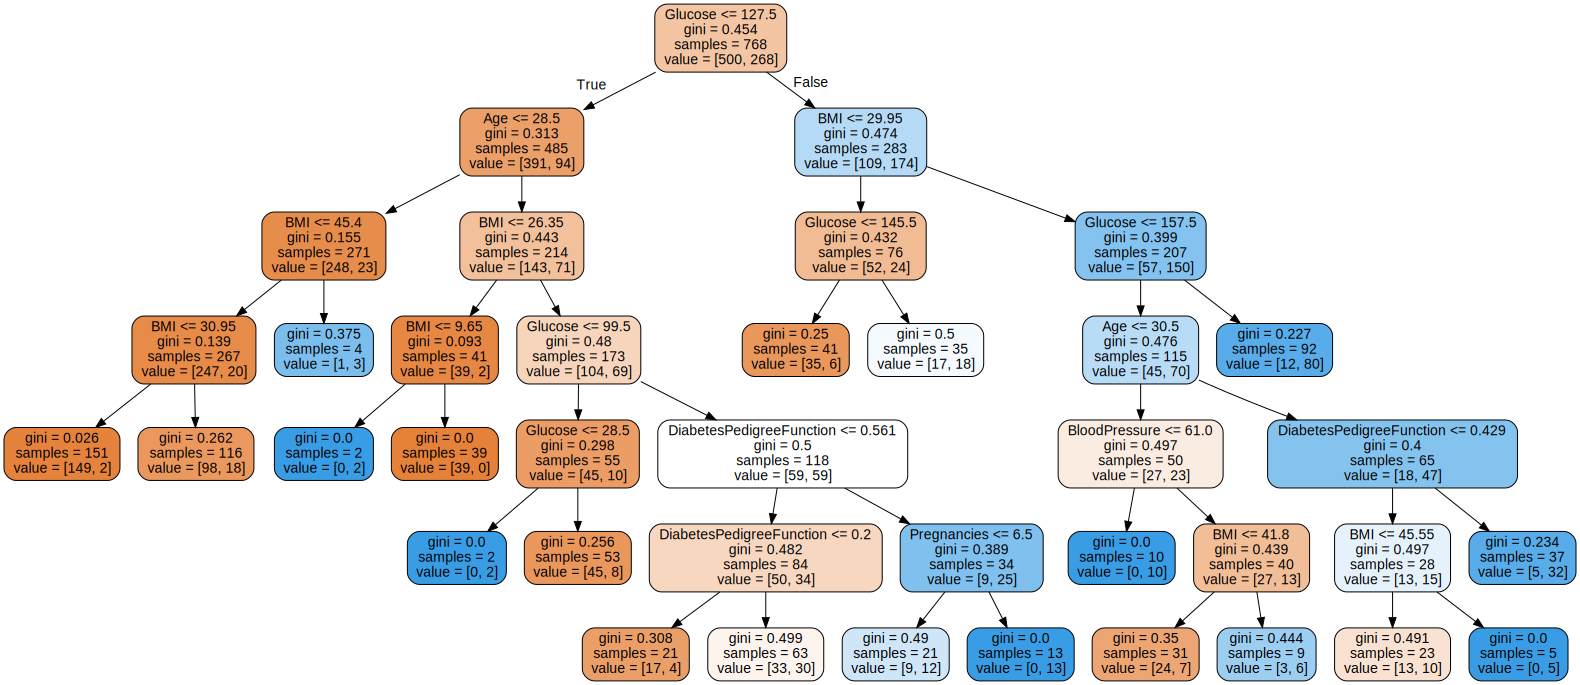

In [17]:
#So I can play with number of leaves

#run model fit
num_leaves = 20
clf = tree.DecisionTreeClassifier(max_leaf_nodes = num_leaves)	
clf = clf.fit(dat, labs)

#Get proportion correct
correct = 0						
for i in range(len(dat)):	
    if clf.predict([dat[i]]) == labs[i]: correct = correct + 1
print('proportion correct: ' + str(100.0* correct / len(dat)))

#configure info / labels for graphics object
dot_data = tree.export_graphviz(clf, feature_names=feats,
                      filled=True, rounded=True)

#create graphics source object and graph it
graph = graphviz.Source(dot_data)	
graph